In [19]:
import pandas as pd
import requests
import sqlite3

In [22]:
def get_listings():
    """Returns a list of all listings."""
    # Connect to the database.
    db = sqlite3.connect("db/listings.db")
    cursor = db.cursor()

    # Get all listings from the database.
    cursor.execute("SELECT * FROM listings")

    # Create a list of all listings.
    listings = []
    for row in cursor.fetchall():
        listings.append(row)

    # Close the connection to the database.
    db.close()

    # Return the list of listings.
    return listings

items = get_listings()

In [23]:
df = pd.DataFrame(items, columns=["id", "title","price", "link"])
df["price"] = df["price"].apply(lambda p: int(p.replace('$', '').replace(',', '')))
df = df[["title", "price", "link"]]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109240 entries, 0 to 109239
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   109240 non-null  object
 1   price   109240 non-null  int64 
 2   link    109240 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.5+ MB


In [25]:
df = df[df["price"] != 0]
df = df.sort_values("price", ascending=False)

In [29]:
make = "Mercedes e350"
tdf = df[df["title"].str.contains(make, case=False)]

In [30]:
tdf

,title,price,link
105925,~~ IMMACULATE 2014 Mercedes e350 ~~,20000,https://honolulu.craigslist.org/oah/cto/d/hono...
105922,~~ IMMACULATE 2014 Mercedes e350 ~~,20000,https://honolulu.craigslist.org/oah/cto/d/hono...
105920,~~ IMMACULATE 2014 Mercedes e350 ~~,20000,https://honolulu.craigslist.org/oah/cto/d/hono...
105910,~~ IMMACULATE 2014 Mercedes e350 ~~,20000,https://honolulu.craigslist.org/oah/cto/d/hono...
17684,2014 Mercedes E350 Wagon 4Matic,14000,https://appleton.craigslist.org/cto/d/oshkosh-...
17698,2014 Mercedes E350 Wagon 4Matic,14000,https://appleton.craigslist.org/cto/d/oshkosh-...
17702,2014 Mercedes E350 Wagon 4Matic,14000,https://appleton.craigslist.org/cto/d/oshkosh-...
17708,2014 Mercedes E350 Wagon 4Matic,14000,https://appleton.craigslist.org/cto/d/oshkosh-...
72448,2012 Mercedes E350 Sedan,11500,https://evansville.craigslist.org/cto/d/evansv...
72426,2012 Mercedes E350 Sedan,11500,https://evansville.craigslist.org/cto/d/evansv...


<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 105925 to 52193
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   46 non-null     object
 1   price   46 non-null     int64 
 2   link    46 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.4+ KB


<Axes: ylabel='Frequency'>

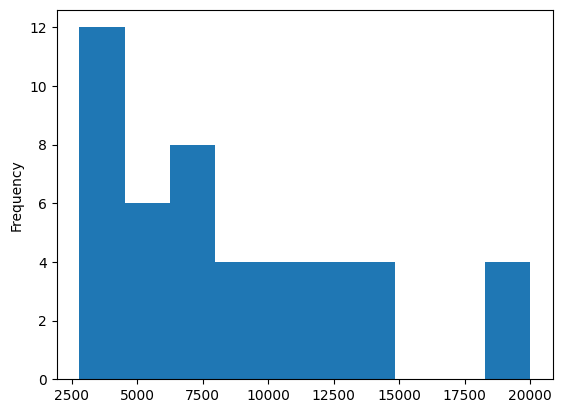

In [31]:
tdf = tdf[tdf["price"] < 30000]
tdf = tdf[tdf["price"] > 1000]
tdf.info()
tdf["price"].plot(kind="hist",bins=10)

In [38]:
tdf.loc[17708]["link"]

'https://appleton.craigslist.org/cto/d/oshkosh-2014-mercedes-e350-wagon-4matic/7694662725.html'